Data Loading

In [0]:
# Import mlflow and autolog machine learning runs

import mlflow
mlflow.pyspark.ml.autolog()


In [0]:
# Read CSV file into Spark DataFrame
 
steam = spark.read.csv("/FileStore/tables/steam_200k.csv", inferSchema = "True")


In [0]:
# View DataFrame

steam.display()


_c0,_c1,_c2,_c3
151603712,The Elder Scrolls V Skyrim,purchase,1.0
151603712,The Elder Scrolls V Skyrim,play,273.0
151603712,Fallout 4,purchase,1.0
151603712,Fallout 4,play,87.0
151603712,Spore,purchase,1.0
151603712,Spore,play,14.9
151603712,Fallout New Vegas,purchase,1.0
151603712,Fallout New Vegas,play,12.1
151603712,Left 4 Dead 2,purchase,1.0
151603712,Left 4 Dead 2,play,8.9


In [0]:
# Define the Names for the Columns

steam = steam.toDF("Member_ID", "Game_Name", "Member_Behaviour", "Behaviour_Value")
steam.show(5, truncate=False)


+---------+--------------------------+----------------+---------------+
|Member_ID|Game_Name                 |Member_Behaviour|Behaviour_Value|
+---------+--------------------------+----------------+---------------+
|151603712|The Elder Scrolls V Skyrim|purchase        |1.0            |
|151603712|The Elder Scrolls V Skyrim|play            |273.0          |
|151603712|Fallout 4                 |purchase        |1.0            |
|151603712|Fallout 4                 |play            |87.0           |
|151603712|Spore                     |purchase        |1.0            |
+---------+--------------------------+----------------+---------------+
only showing top 5 rows



In [0]:
# Creating Game_ID Column and Adding into the DataFrame

from pyspark.sql.functions import *
from pyspark.sql.window import Window

# Create a window partitioned by Game_Name to generate Unique Game_IDs

windowSpec = Window.orderBy("Game_Name")

# Create Game_ID Column with dense rank

game_ids = steam.select("Game_Name").distinct().withColumn("Game_ID", dense_rank().over(windowSpec) - 1)

# Add Game_ID Column to the Original DataFrame

final_steam = steam.join(game_ids, on="Game_Name")

# View the DataFrame

final_steam.show()


+--------------------+---------+----------------+---------------+-------+
|           Game_Name|Member_ID|Member_Behaviour|Behaviour_Value|Game_ID|
+--------------------+---------+----------------+---------------+-------+
|The Elder Scrolls...|151603712|        purchase|            1.0|   4364|
|The Elder Scrolls...|151603712|            play|          273.0|   4364|
|           Fallout 4|151603712|        purchase|            1.0|   1678|
|           Fallout 4|151603712|            play|           87.0|   1678|
|               Spore|151603712|        purchase|            1.0|   3997|
|               Spore|151603712|            play|           14.9|   3997|
|   Fallout New Vegas|151603712|        purchase|            1.0|   1679|
|   Fallout New Vegas|151603712|            play|           12.1|   1679|
|       Left 4 Dead 2|151603712|        purchase|            1.0|   2475|
|       Left 4 Dead 2|151603712|            play|            8.9|   2475|
|            HuniePop|151603712|      

Exploratory Data Analysis

In [0]:
### Data Types of Each Column

final_steam.printSchema()


root
 |-- Game_Name: string (nullable = true)
 |-- Member_ID: integer (nullable = true)
 |-- Member_Behaviour: string (nullable = true)
 |-- Behaviour_Value: double (nullable = true)
 |-- Game_ID: integer (nullable = false)



+----------------+------+
|Member_Behaviour| count|
+----------------+------+
|        purchase|129511|
|            play| 70489|
+----------------+------+



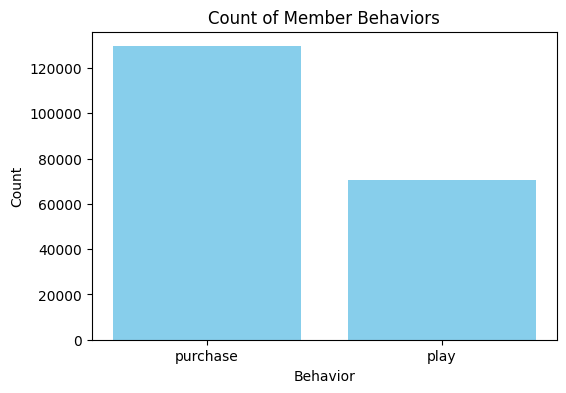

In [0]:
### Unique values of Member_Behaviour and their frequency 

final_steam.groupBy("Member_Behaviour").count().show()

### Visualization of Unique values of Member_Behaviour and their frequency 

import matplotlib.pyplot as plt
import pandas as pd

# Creating Pandas DataFrame

behavior_counts = final_steam.groupBy("Member_Behaviour").count().toPandas()

# Plotting the Data

plt.figure(figsize=(6, 4))
plt.bar(behavior_counts["Member_Behaviour"], behavior_counts["count"], color='skyblue')
plt.title('Count of Member Behaviors')
plt.xlabel('Behavior')
plt.ylabel('Count')
plt.show()


In [0]:
### Number of Distinct Game Names

distinct_game_names_count = final_steam.select(countDistinct("Game_Name")).collect()[0][0]

print("Number of distinct game names:", distinct_game_names_count)


Number of distinct game names: 5155


+--------------------+-----+
|           Game_Name|count|
+--------------------+-----+
|              Dota 2| 4841|
|     Team Fortress 2| 2323|
|            Unturned| 1563|
|Counter-Strike Gl...| 1412|
|Half-Life 2 Lost ...|  981|
|Counter-Strike So...|  978|
|       Left 4 Dead 2|  951|
|      Counter-Strike|  856|
|            Warframe|  847|
|Half-Life 2 Death...|  823|
+--------------------+-----+



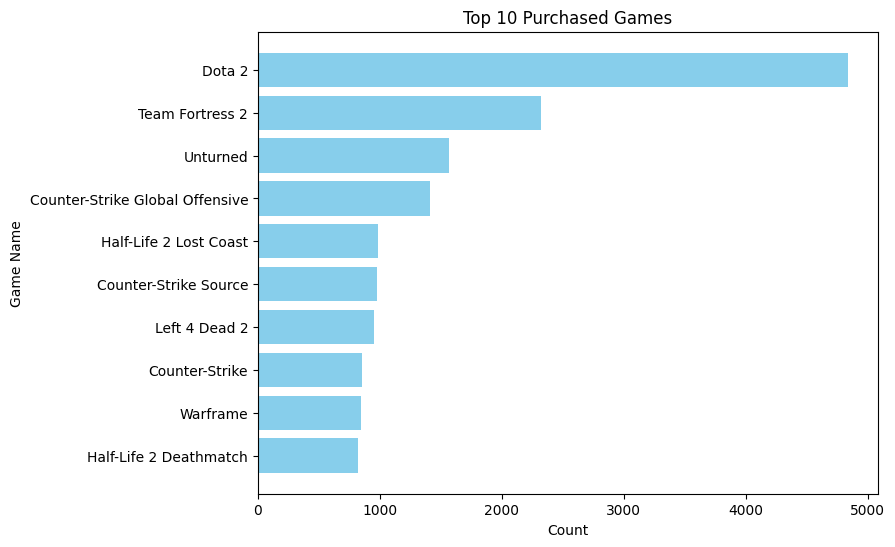

In [0]:
### Top 10 Games Highly Purchased

from pyspark.sql.functions import desc

purchased_counts = final_steam.filter(final_steam["Member_Behaviour"] == "purchase") \
    .groupBy("Game_Name") \
    .count() \
    .orderBy(desc("count"))

# Show only Top 10 games

top_10_purchased_counts = purchased_counts.limit(10)

top_10_purchased_counts.show()

### Visualization of Top 10 Games Highly Purchased

import matplotlib.pyplot as plt
import pandas as pd

# Create Pandas DataFrame

top_10_purchased_counts_pd = top_10_purchased_counts.toPandas()

# Plotting the Data

plt.figure(figsize=(8, 6))
plt.barh(top_10_purchased_counts_pd["Game_Name"], top_10_purchased_counts_pd["count"], color='skyblue')
plt.title('Top 10 Purchased Games')
plt.xlabel('Count')
plt.ylabel('Game Name')
plt.gca().invert_yaxis()
plt.show()


+--------------------+-------------------+
|           Game_Name|Total_Playing_Hours|
+--------------------+-------------------+
|              Dota 2|           981684.6|
|Counter-Strike Gl...|           322771.6|
|     Team Fortress 2|           173673.3|
|      Counter-Strike|           134261.1|
|Sid Meier's Civil...|            99821.3|
|Counter-Strike So...|            96075.5|
|The Elder Scrolls...|            70889.3|
|         Garry's Mod|            49725.3|
|Call of Duty Mode...|            42009.9|
|       Left 4 Dead 2|            33596.7|
+--------------------+-------------------+



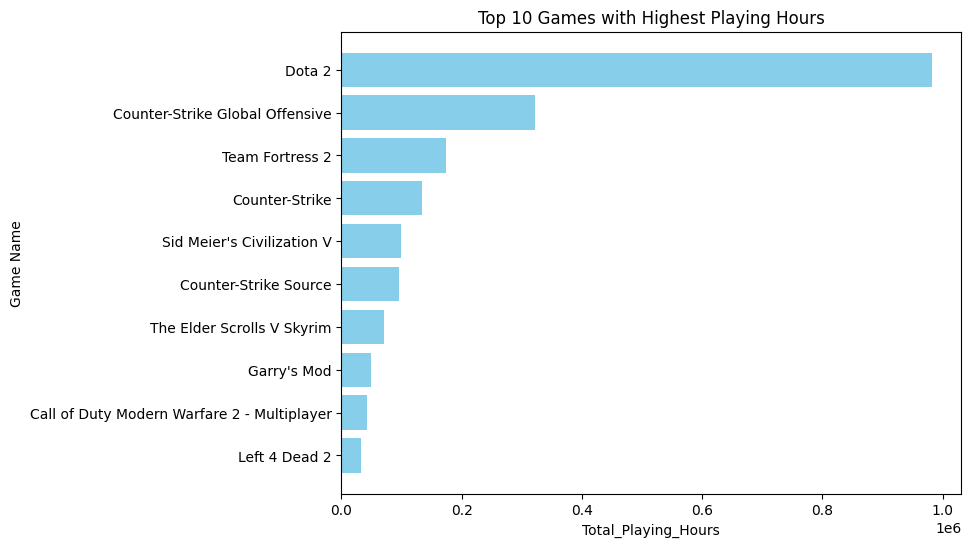

In [0]:
### Top 10 Games with Highest Playing Hours

from pyspark.sql.functions import *

playing_hours_counts = final_steam.filter(final_steam["Member_Behaviour"] == "play") \
    .groupBy("Game_Name") \
    .sum("Behaviour_Value") \
    .withColumnRenamed("sum(Behaviour_Value)", "Total_Playing_Hours") \
    .withColumn("Total_Playing_Hours", round("Total_Playing_Hours", 2))

# Show only Top 10 Games Playing Hours

top_10_playing_hours = playing_hours_counts.orderBy(desc("Total_Playing_Hours")).limit(10)

top_10_playing_hours.show()

### Visualization of Top 10 Games with Highest Playing Hours

import matplotlib.pyplot as plt
import pandas as pd

# Create Pandas DataFrame

top_10_playing_hours_pd = top_10_playing_hours.toPandas()

# Plotting the Data

plt.figure(figsize=(8, 6))
plt.barh(top_10_playing_hours_pd["Game_Name"], top_10_playing_hours_pd["Total_Playing_Hours"], color='skyblue')
plt.title('Top 10 Games with Highest Playing Hours')
plt.xlabel('Total_Playing_Hours')
plt.ylabel('Game Name')
plt.gca().invert_yaxis()
plt.show()


In [0]:
### Total Number of Members

from pyspark.sql.functions import countDistinct

total_members = final_steam.select(countDistinct("Member_ID")).collect()[0][0]

print("Total Number of Members:", total_members)


Total Number of Members: 12393


In [0]:
### Top 10 Members who purchased the Most Games

from pyspark.sql.functions import countDistinct, desc

top_10_members_purchased_games = final_steam.filter(final_steam["Member_Behaviour"] == "purchase") \
    .groupBy("Member_ID") \
    .agg(countDistinct("Game_Name").alias("Purchased_Games_Count")) \
    .orderBy(desc("Purchased_Games_Count")) \
    .limit(10)

# Show the Result

top_10_members_purchased_games.show()


+---------+---------------------+
|Member_ID|Purchased_Games_Count|
+---------+---------------------+
| 62990992|                 1068|
| 33865373|                  776|
| 30246419|                  759|
| 58345543|                  666|
| 76892907|                  597|
| 20772968|                  592|
| 11403772|                  588|
| 64787956|                  584|
| 22301321|                  565|
| 47457723|                  554|
+---------+---------------------+



Data Preparation and Pre-Processing

In [0]:
### Missing Values in the dataset

final_steam.select([count(when(isnull(c), c)).alias(c) for c in final_steam.columns]).show()


+---------+---------+----------------+---------------+-------+
|Game_Name|Member_ID|Member_Behaviour|Behaviour_Value|Game_ID|
+---------+---------+----------------+---------------+-------+
|        0|        0|               0|              0|      0|
+---------+---------+----------------+---------------+-------+



In [0]:
### Creating a New DataFrame including only Purchase Behavior

from pyspark.sql.functions import lit

purchase_data = final_steam.filter(final_steam["Member_Behaviour"] == "purchase")

# Assign a Constant Rating Value of 1.0 for Purchase

purchase_data = purchase_data.withColumn("Rating", lit(1.0))

# View the DataFrame

purchase_data.show(5)


+--------------------+---------+----------------+---------------+-------+------+
|           Game_Name|Member_ID|Member_Behaviour|Behaviour_Value|Game_ID|Rating|
+--------------------+---------+----------------+---------------+-------+------+
|The Elder Scrolls...|151603712|        purchase|            1.0|   4364|   1.0|
|           Fallout 4|151603712|        purchase|            1.0|   1678|   1.0|
|               Spore|151603712|        purchase|            1.0|   3997|   1.0|
|   Fallout New Vegas|151603712|        purchase|            1.0|   1679|   1.0|
|       Left 4 Dead 2|151603712|        purchase|            1.0|   2475|   1.0|
+--------------------+---------+----------------+---------------+-------+------+
only showing top 5 rows



In [0]:
### Split the Dataset into Training and Test

train_data, test_data = purchase_data.randomSplit([0.8, 0.2], seed=100)

# Display the Training Data

print("Training Data:")
train_data.show(5)

# Display the Test Data

print("Test Data:")
test_data.show(5)


Training Data:
+--------------------+---------+----------------+---------------+-------+------+
|           Game_Name|Member_ID|Member_Behaviour|Behaviour_Value|Game_ID|Rating|
+--------------------+---------+----------------+---------------+-------+------+
|         007 Legends| 46055854|        purchase|            1.0|      0|   1.0|
|           0RBITALIS| 86055705|        purchase|            1.0|      1|   1.0|
|1... 2... 3... KI...| 11794760|        purchase|            1.0|      2|   1.0|
|1... 2... 3... KI...| 49893565|        purchase|            1.0|      2|   1.0|
|1... 2... 3... KI...| 65117175|        purchase|            1.0|      2|   1.0|
+--------------------+---------+----------------+---------------+-------+------+
only showing top 5 rows

Test Data:
+--------------------+---------+----------------+---------------+-------+------+
|           Game_Name|Member_ID|Member_Behaviour|Behaviour_Value|Game_ID|Rating|
+--------------------+---------+----------------+---------

Training the Model

In [0]:
### Create Alternating Least Squares (ALS) Model and Fit it

from pyspark.ml.recommendation import ALS

# ALS Model Creation

als = ALS(rank=5, maxIter=5, regParam=0.01, userCol="Member_ID", itemCol="Game_ID", ratingCol="Rating", seed=100)

# Fit the Model on the Training Data

model = als.fit(train_data)


2024/04/17 04:27:54 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'eeeb97ddf18e42c193ac2212553e8599', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2024/04/17 04:27:55 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/databricks/python/lib/python3.10/site-packages/mlflow/data/spark_dataset.py:159: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missi

Evaluating the Model

In [0]:
### Make Predictions on the Test Data

predictions = model.transform(test_data).dropna()
predictions.show(5)


+--------------------+---------+----------------+---------------+-------+------+----------+
|           Game_Name|Member_ID|Member_Behaviour|Behaviour_Value|Game_ID|Rating|prediction|
+--------------------+---------+----------------+---------------+-------+------+----------+
|           0RBITALIS| 93030550|        purchase|            1.0|      1|   1.0| 0.9807775|
|1... 2... 3... KI...| 78560022|        purchase|            1.0|      2|   1.0| 0.9916531|
|     10 Second Ninja| 33013552|        purchase|            1.0|      3|   1.0| 0.9866358|
|   100% Orange Juice| 93644606|        purchase|            1.0|      5|   1.0| 0.9957553|
|   100% Orange Juice|167815968|        purchase|            1.0|      5|   1.0| 0.9768456|
+--------------------+---------+----------------+---------------+-------+------+----------+
only showing top 5 rows



In [0]:
### Evaluate the Model using RMSE

from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(metricName="rmse", labelCol="Rating", predictionCol="prediction")
rmse = evaluator.evaluate(predictions)

print("Root Mean Squared Error (RMSE) on test data:", rmse)


Root Mean Squared Error (RMSE) on test data: 0.048963097737559115


Generate Recommendations

In [0]:
### Using the Model to Generate Recommendations

gameRecs = model.recommendForAllUsers(10)


In [0]:
### View the Recommendations

gameRecs.show(truncate=False)


+---------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Member_ID|recommendations                                                                                                                                                                             |
+---------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|76767    |[{599, 2.0167415}, {2955, 1.8750494}, {3271, 1.5753565}, {4015, 1.5214983}, {2662, 1.4897876}, {2853, 1.3360257}, {446, 1.2758827}, {2361, 1.274899}, {2535, 1.2723205}, {1474, 1.2504042}] |
|144736   |[{599, 2.0465808}, {2955, 1.9279679}, {3271, 1.702297}, {2662, 1.6900009}, {4015, 1.6781391}, {2853, 1.4530922}, {446, 1.3821685}, {2535, 1.3509436}, {2462, 1.3500199}, {2361, 1.3269303

Evaluation of Recommendations

In [0]:
#### View Recommendations for the Member who purchased highest Games

from pyspark.sql.functions import explode

# Extract unique game names along with their IDs

game_names_df = final_steam.select("Game_ID", "Game_Name").distinct()

# Now, join the recommendation data with the extracted game names DataFrame

gameRecs.where(gameRecs.Member_ID == 62990992).select("recommendations")\
    .withColumn("recommendations", explode("recommendations"))\
    .select("recommendations.Game_ID", "recommendations.Rating")\
    .join(game_names_df, on="Game_ID", how="inner")\
    .show(truncate=False)


+-------+---------+--------------------------------------------+
|Game_ID|Rating   |Game_Name                                   |
+-------+---------+--------------------------------------------+
|120    |1.2026483|Afterfall InSanity - Dirty Arena Edition    |
|599    |1.802136 |Bloodwood Reload                            |
|1474   |1.182584 |Electric Highways                           |
|1535   |1.1597245|Eternal Fate                                |
|1987   |1.130199 |Gravity Badgers                             |
|2662   |1.2894785|Maszyny Rolnicze 2015                       |
|2853   |1.3816752|NBA 2K9                                     |
|2955   |1.8699144|Nobunaga's Ambition Souzou with Power Up Kit|
|3271   |1.4373908|Pro Evolution Soccer 2015                   |
|4873   |1.224741 |WTFast Gamers Private Network (GPN)         |
+-------+---------+--------------------------------------------+



In [0]:
### Extract Top-N Recommendations for each Member

from pyspark.sql.functions import col, explode, desc

# Explode the recommendations column to separate Game_ID and Rating

exploded_df = gameRecs.withColumn("recommendation", explode("recommendations")) \
    .select("Member_ID", col("recommendation.Game_ID").alias("Game_ID"), col("recommendation.Rating").alias("Rating"))

# Extract Top-N Recommendations for each Member

top_n_recommendations = exploded_df.groupBy("Member_ID").agg(collect_list("Game_ID").alias("Top_N_Recommendations"))

# Display the Results

print("Top-N Recommendations:")
top_n_recommendations.show(truncate=False)


Top-N Recommendations:
+---------+-----------------------------------------------------------+
|Member_ID|Top_N_Recommendations                                      |
+---------+-----------------------------------------------------------+
|5250     |[599, 2955, 2662, 4015, 3271, 2853, 446, 2462, 2535, 2361] |
|76767    |[599, 2955, 3271, 4015, 2662, 2853, 446, 2361, 2535, 1474] |
|86540    |[2955, 599, 2853, 3271, 2662, 4873, 120, 1535, 1474, 4339] |
|103360   |[599, 2955, 4015, 2662, 3271, 446, 2535, 2462, 2853, 4613] |
|144736   |[599, 2955, 3271, 2662, 4015, 2853, 446, 2535, 2462, 2361] |
|181212   |[599, 2955, 3271, 2662, 4015, 2853, 446, 2462, 2535, 2361] |
|229911   |[599, 2955, 4015, 3271, 2662, 2853, 446, 2361, 1755, 2535] |
|298950   |[599, 2955, 2853, 3271, 2662, 4873, 4015, 1474, 1535, 4339]|
|299153   |[599, 2955, 4015, 3271, 2662, 446, 2853, 2535, 2462, 2361] |
|381543   |[599, 2955, 4015, 2662, 3271, 446, 2535, 4613, 2462, 2361] |
|547685   |[599, 2955, 3271, 2662, 4015, 

In [0]:
### Identify the Most Popular Games recommended across all Members

from pyspark.sql.functions import desc

# Calculate the Counts of each Game ID

popular_games = exploded_df.groupBy("Game_ID").count()

# Join with game_names_df to get the Game Names

popular_games_with_names = popular_games.join(game_names_df, on="Game_ID", how="inner") \
    .orderBy(desc("count")).limit(10)

# Show the Result

popular_games_with_names.show(truncate=False)


+-------+-----+--------------------------------------------------------+
|Game_ID|count|Game_Name                                               |
+-------+-----+--------------------------------------------------------+
|2955   |10909|Nobunaga's Ambition Souzou with Power Up Kit            |
|599    |10880|Bloodwood Reload                                        |
|3271   |10530|Pro Evolution Soccer 2015                               |
|2662   |10010|Maszyny Rolnicze 2015                                   |
|4015   |9046 |Star Trek D-A-C                                         |
|446    |7640 |Basement                                                |
|2535   |5778 |London 2012 The Official Video Game of the Olympic Games|
|2361   |5568 |Karos Returns                                           |
|1474   |5508 |Electric Highways                                       |
|2853   |5421 |NBA 2K9                                                 |
+-------+-----+------------------------------------

Hyperparameter Tuning

In [0]:
# Define Hyperparameter Grid

from pyspark.ml.tuning import ParamGridBuilder

param_grid = ParamGridBuilder() \
    .addGrid(als.rank, [5, 10]) \
    .addGrid(als.maxIter, [5, 10]) \
    .addGrid(als.regParam, [0.01, 0.1]) \
    .build()


In [0]:
# Define Evaluator

from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(metricName="rmse", labelCol="Rating", predictionCol="prediction")


In [0]:
# Define TrainValidationSplit

from pyspark.ml.tuning import TrainValidationSplit

tvs = TrainValidationSplit()\
.setSeed(100)\
.setTrainRatio(0.80)\
.setEstimatorParamMaps(param_grid)\
.setEstimator(als)\
.setEvaluator(evaluator)


In [0]:
# Tain Model using TrainValidationSplit

tvs_model = tvs.fit(train_data)


2024/04/17 04:29:54 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '89146c24924f4bc6b1c35149bb177201', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2024/04/17 04:33:11 WARNING mlflow.pyspark.ml: Model TrainValidationSplitModel_60bb3e8fc7c0 will not be autologged because it is not allowlisted or or because one or more of its nested models are not allowlisted. Call mlflow.spark.log_model() to explicitly log the model, or specify a custom allowlist via the spark.mlflow.pysparkml.autolog.logModelAllowlistFile Spark conf (see mlflow.pyspark.ml.autolog docs for more info).


In [0]:
# Get the Best Model

best_model = tvs_model.bestModel

# Show the Best Parameters

print("Parameters for the Best Model:")
print("Rank: %g" % best_model.rank)
print("Max Iterations: %d" % best_model._java_obj.parent().getMaxIter())
print("Regularization Parameter: %f" % best_model._java_obj.parent().getRegParam())


Parameters for the Best Model:
Rank: 5
Max Iterations: 5
Regularization Parameter: 0.010000
